#### Importing all the required libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style='whitegrid')
import os
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
os.chdir(r"D:\Upgrad\Assignment 3-Bike_Sharing")

#### Reading the data set

In [3]:
Bike = pd.read_csv("day.csv",encoding='ISO-8859-1')

In [4]:
#checking null values 
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bike.shape

(730, 16)

In [7]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

**Missing value in percentage (%)**

In [10]:
missing = round(100*(Bike.isnull().sum()/len(Bike.index)), 2)
missing.loc[missing > 0]

Series([], dtype: float64)

**Renaming some variable**

In [11]:
Bike.rename(columns={'yr':'year','mnth':'month','temp':'temperature','hum':'humidity','cnt':'count',},inplace=True)

In [12]:
Bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#Dropping the unnecessary variable 
Bike.drop(['instant','dteday','casual','registered','holiday'],axis=1,inplace=True)

**We already have "year" ,"month", "holiday","working day", So "dteday" column is not required, we are drop column.

As we are not having "casual" and "registered" while prediction,its looks as target variable, but here we have to predict the overall demand,As our target variable is count,so we can drop casual and register variable.**

In [14]:
Bike.head()

,season,year,month,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
Bike1 = Bike.copy()

## Data Preparation

**Assigning label to the value**

In [16]:
'''Season 
1:spring
2:summer
3:fall
4:winter'''

Bike['season']= Bike['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [17]:
'''Year
2018:0
2019:1'''
Bike1['year']= Bike1['year'].map({0:"2018",1:"2019"})

In [18]:
'''Month
1:Jan
2:Feb
3:Mar
4:Apr
5:May
6:June
7:July
8:Aug
9:Sep
10:Oct
11:Nov
12:Dec'''

Bike['month']= Bike['month'].map({1:"jan",2:"feb",3:"mar",4:"april",5:"may",6:"june",
                                7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"})

In [19]:
'''weekday
0:Sun
1:Mon
2:Tue
3:Wed
4:Thu
5:Fri
6:Sat'''
Bike['weekday']= Bike['weekday'].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

In [20]:
'''Weathersit

1: Clear, Few clouds, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'''

Bike['weathersit']= Bike['weathersit'].map({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"})

In [21]:
'''workingday
Non-Workingday:0
Workingday:1'''
Bike1['workingday']= Bike1['workingday'].map({0:"Non-Workingday",1:"Workingday"})

## Data Visualization

<AxesSubplot:xlabel='season', ylabel='count'>

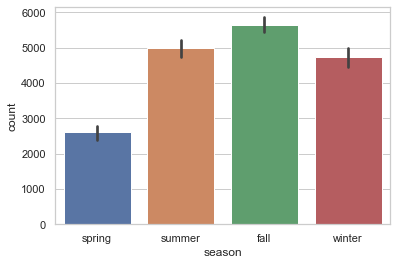

In [22]:
sns.barplot('season','count',data=Bike)

**Inference: Bike rental count is high during fall season**

<AxesSubplot:xlabel='year', ylabel='count'>

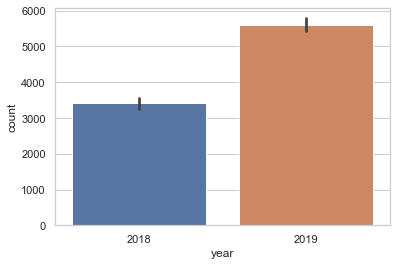

In [23]:
sns.barplot(x='year',y='count',data=Bike1)

**Inference: Bike rental increases in 2019 compared to 2018.**

<AxesSubplot:xlabel='month', ylabel='count'>

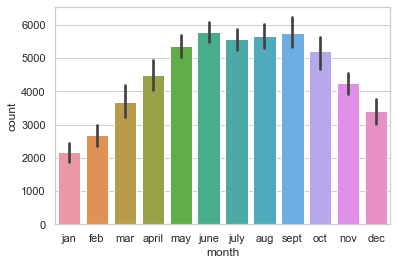

In [24]:
sns.barplot(x='month',y='count',data=Bike)

**Inference: June to Sept shows peak in bike rental**

<AxesSubplot:xlabel='weekday', ylabel='count'>

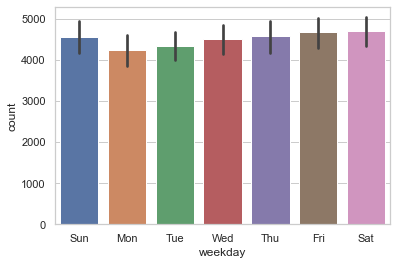

In [25]:
sns.barplot(x='weekday',y='count',data=Bike)

**Inference: Not much difference in the bike rental count between weekend and weekdays**

<AxesSubplot:xlabel='workingday', ylabel='count'>

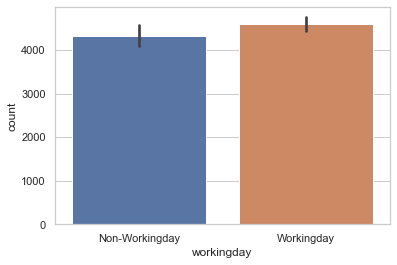

In [26]:
sns.barplot(x='workingday',y='count',data=Bike1)

**Inference: Working day shows increased bike rental count**

<AxesSubplot:xlabel='weathersit', ylabel='count'>

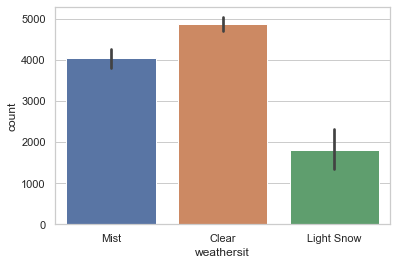

In [27]:
sns.barplot(x='weathersit',y='count',data=Bike)

**Inference: The bike rental is more during Clear, Few clouds, Partly cloudy**

<AxesSubplot:xlabel='count', ylabel='Density'>

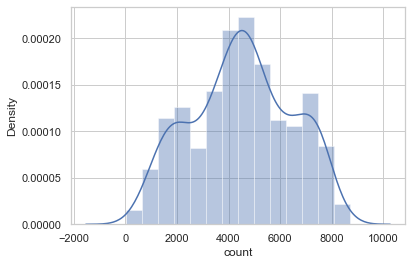

In [28]:
sns.distplot(Bike['count'])

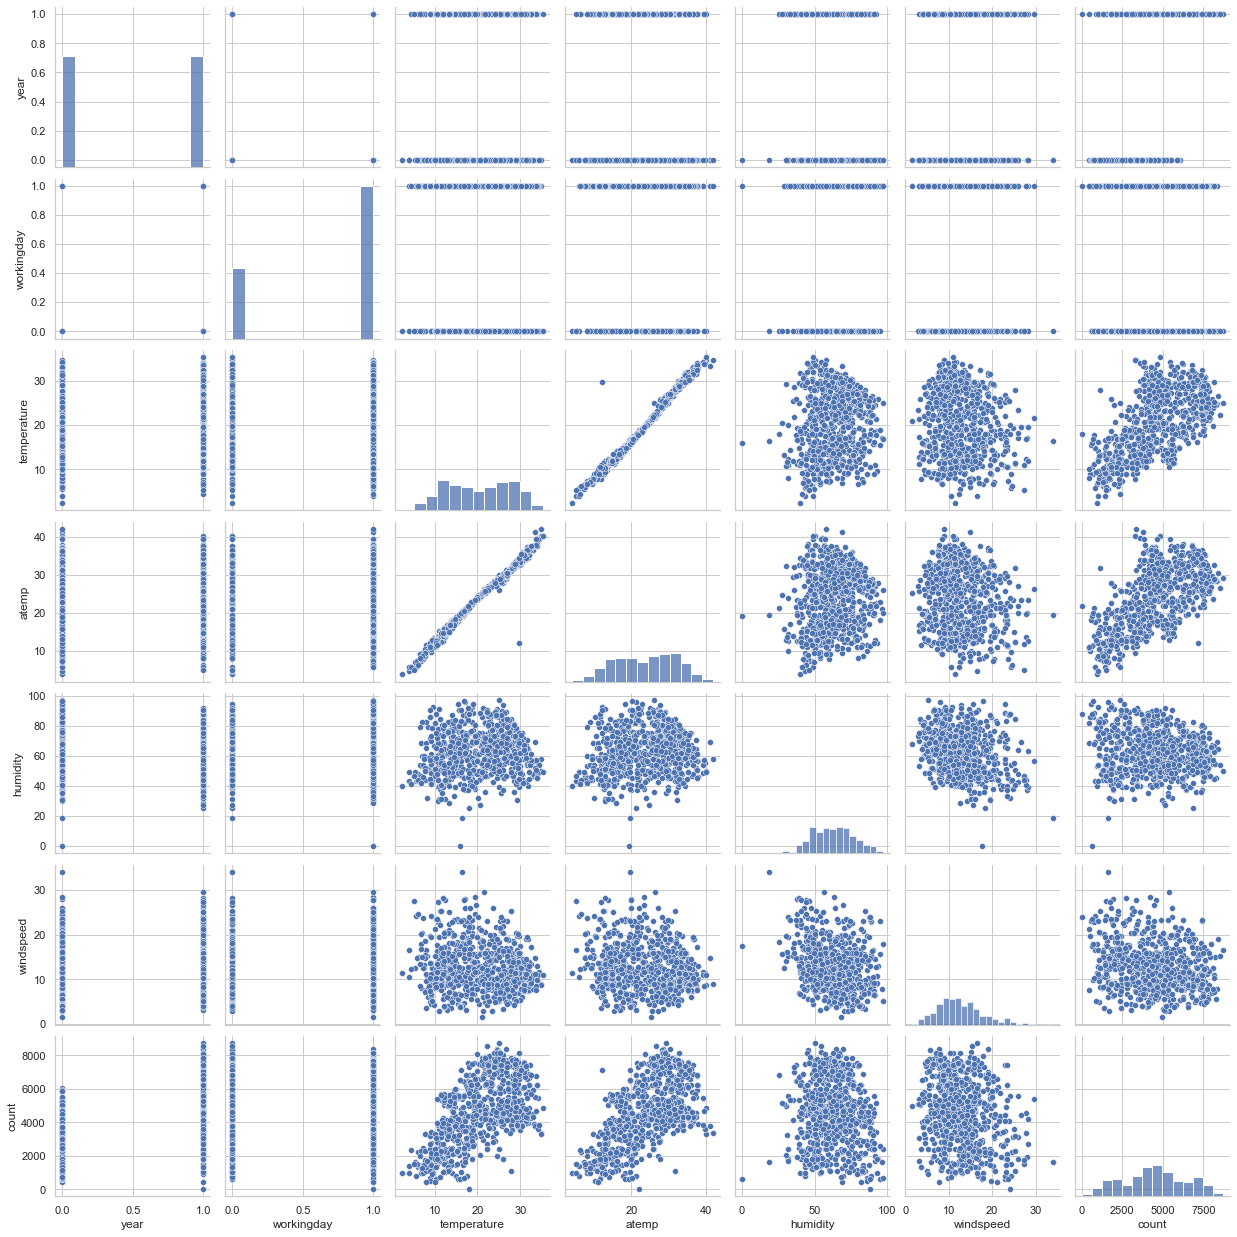

In [29]:
sns.pairplot(Bike)
plt.show()

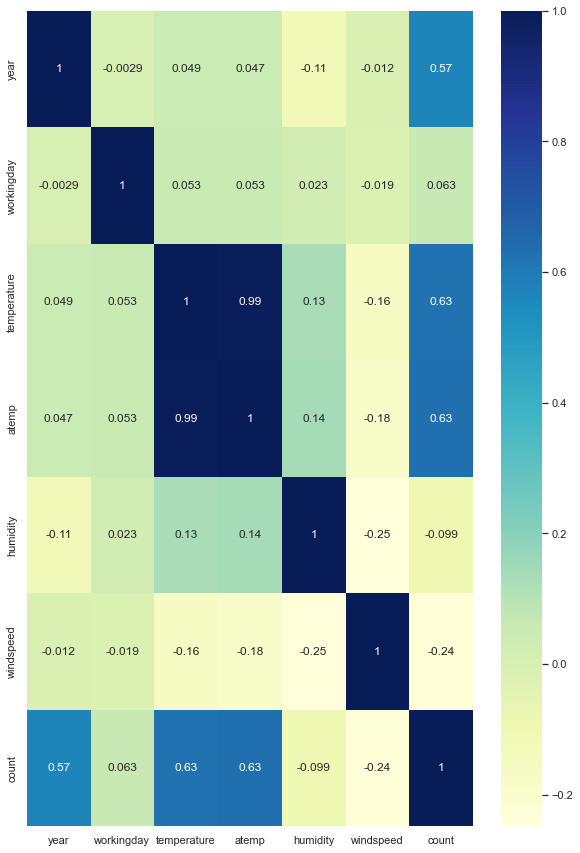

In [30]:
plt.figure(figsize = (10,15))
sns.heatmap(Bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

**The temperature and atemp variable is highly coorelated, will keep only one feature in the dataset as two features are highly correlated**

In [31]:
#dropping highly correlated variable
Bike.drop(['atemp'],axis=1,inplace=True)

### Creating dummy variables

In [32]:
# Let's drop the first column from 'season','month','weekday','weathersit' Bike using 'drop_first = True'
seasons = pd.get_dummies(Bike['season'],drop_first=True)
month = pd.get_dummies(Bike['month'],drop_first=True)
weekday = pd.get_dummies(Bike['weekday'],drop_first=True)
weathersit = pd.get_dummies(Bike['weathersit'],drop_first=True)
working_day = pd.get_dummies(Bike['workingday'],drop_first=True)

In [33]:
# Add the results to the original Bike dataframe

Bike = pd.concat([Bike, seasons,month,weekday,weathersit,working_day], axis = 1)

Bike.head()

,season,year,month,weekday,workingday,weathersit,temperature,humidity,windspeed,count,...,sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,1
0,spring,0,jan,Sun,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,jan,Mon,0,Mist,14.902598,69.6087,16.652113,801,...,0,1,0,0,0,0,0,0,1,0
2,spring,0,jan,Tue,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,1,0,0,0,1
3,spring,0,jan,Wed,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,jan,Thu,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,1,0,0,0,0,1


In [34]:
# Dropping  variables 
# As we already created dummy variable for 'season','month','weekday','weathersit' ,so drop those variable.

Bike.drop(['season','month','weekday','weathersit','workingday'], axis = 1, inplace = True)

### Splitting the Data into Training and Testing Sets

In [35]:
# We specify this so that the train and test data set always have the same rows, respectively

from sklearn.model_selection import train_test_split

np.random.seed(0)
Bike_train, Bike_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
#check the shape of train dataset 
print(Bike_train.shape)

#check the shape of train dataset
print(Bike_test.shape)

(510, 28)
(219, 28)


### Rescaling the Features

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
num_vars = ['humidity','temperature','windspeed','count']

Bike_train[num_vars] = scaler.fit_transform(Bike_train[num_vars])

In [39]:
Bike_train.head()

,year,temperature,humidity,windspeed,count,spring,summer,winter,aug,dec,...,sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,1
653,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
576,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
Bike_train.describe()

,year,temperature,humidity,windspeed,count,spring,summer,winter,aug,dec,...,sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,1
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137,0.676471
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [41]:
y_train = Bike_train.pop('count')
X_train = Bike_train

In [42]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [43]:
X_train.head()

,year,temperature,humidity,windspeed,spring,summer,winter,aug,dec,feb,...,sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,1
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Building prediction model

In [44]:
#Using the LinearRegression function from SciKit Learn for its compatibility with RFE(Recursive feature elimination) (which is a utility from sklearn)

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 17),
 ('mar', False, 18),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 14),
 ('sept', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 (1, False, 2)]

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding constant to the variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

In [ ]:
# Fitting the model

lm = sm.OLS(y_train,X_train_rfe).fit()
lm.params

In [ ]:
# summary of linear model
lm.summary()

**We have variables with p-value less than 0.05**

In [ ]:
X_train_drop = X_train_rfe.drop('Sun',1)
X_train_drop

In [ ]:
X_train_2 = sm.add_constant(X_train_drop)

lm_1=sm.OLS(y_train,X_train_2).fit()

lm_1.summary()

In [ ]:
X_train_drop1 = X_train_2.drop('const',1)
X_train_drop1

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_drop1
X.head()


In [ ]:
vif['Features'] = X.columns
vif['Features']

In [ ]:
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif['VIF']

In [ ]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [ ]:
X_train_drop2 =X_train_drop1.drop('humidity',1)
X_train_drop2

In [ ]:
X_train_3 = sm.add_constant(X_train_drop2)

lm_3= sm.OLS(y_train,X_train_3).fit()

lm_3.summary()

In [ ]:
X_train_drop3 = X_train_3.drop('const',1)
X_train_drop3

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_drop3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

****As we see that p_value < 0.05 and vif(variance inflation factor) value is < 5% ,now we can say model is good****

## Residual Analysis of the train data

In [ ]:
y_train_price = lm_3.predict(X_train_3)

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Prediction Analysis:
**Applying the scaling on the test sets**

In [ ]:
num_vars = ['humidity','temperature','windspeed','count']


Bike_test[num_vars] = scaler.transform(Bike_test[num_vars])

In [ ]:
Bike_test.head()

In [ ]:
Bike_test.describe()

In [ ]:
y_test = Bike_test.pop('count')
X_test = Bike_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_drop3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test_new.head()

In [ ]:
# Making predictions
y_test_pred = lm_3.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test , y_pred = y_test_pred )

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                         # Y-label

In [ ]:
lm_3.summary()

## EQUATION OF BEST FIT LINE<br><br>
### count = 0.3038 + 0.2327 year + 0.3937 temperature + (-0.1525) windspeed + (-0.1460) spring + (-0.0727) july + 0.0531 sept + (-0.2748) Light Snow + (-0.0804) Mist<br><br>

Overall the model looks good<br><br>

The variables used to understand the bike rental counts are below:<br><br>

1. Temperature<br>
2. Light Snow<br>
3. Year<br>